In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data
data= pd.read_csv('MLP1.csv')

data.head()
#data.rename(columns={'POWER':'Power'},inplace=True)
#data.rename(columns={'SCAN SPEED(MM/S)':'Scan Speed'},inplace=True)
#data.rename(columns={'SPOT SIZE(UM)':'Spot Size'},inplace=True)


,Mode,Power,Scan Speed,Spot Size,Ref
0,1,100,150,55,17
1,1,100,200,55,17
2,0,100,250,55,17
3,0,100,300,55,17
4,1,200,200,55,17


In [3]:
# Dropping The Reference Coloumn
col=['Ref']
data1=data.drop(col,axis=1)


In [4]:
# Data Set Description
data1.describe()

,Mode,Power,Scan Speed,Spot Size
count,70.000000,70.000000,70.000000,70.000000
mean,0.571429,241.414286,1019.657143,65.842857
std,0.498445,122.533816,777.320181,22.064882
min,0.000000,50.000000,100.000000,52.000000
25%,0.000000,150.000000,400.000000,52.000000
50%,1.000000,200.000000,800.000000,55.000000
75%,1.000000,300.000000,1500.000000,55.000000
max,1.000000,500.000000,3000.000000,130.000000


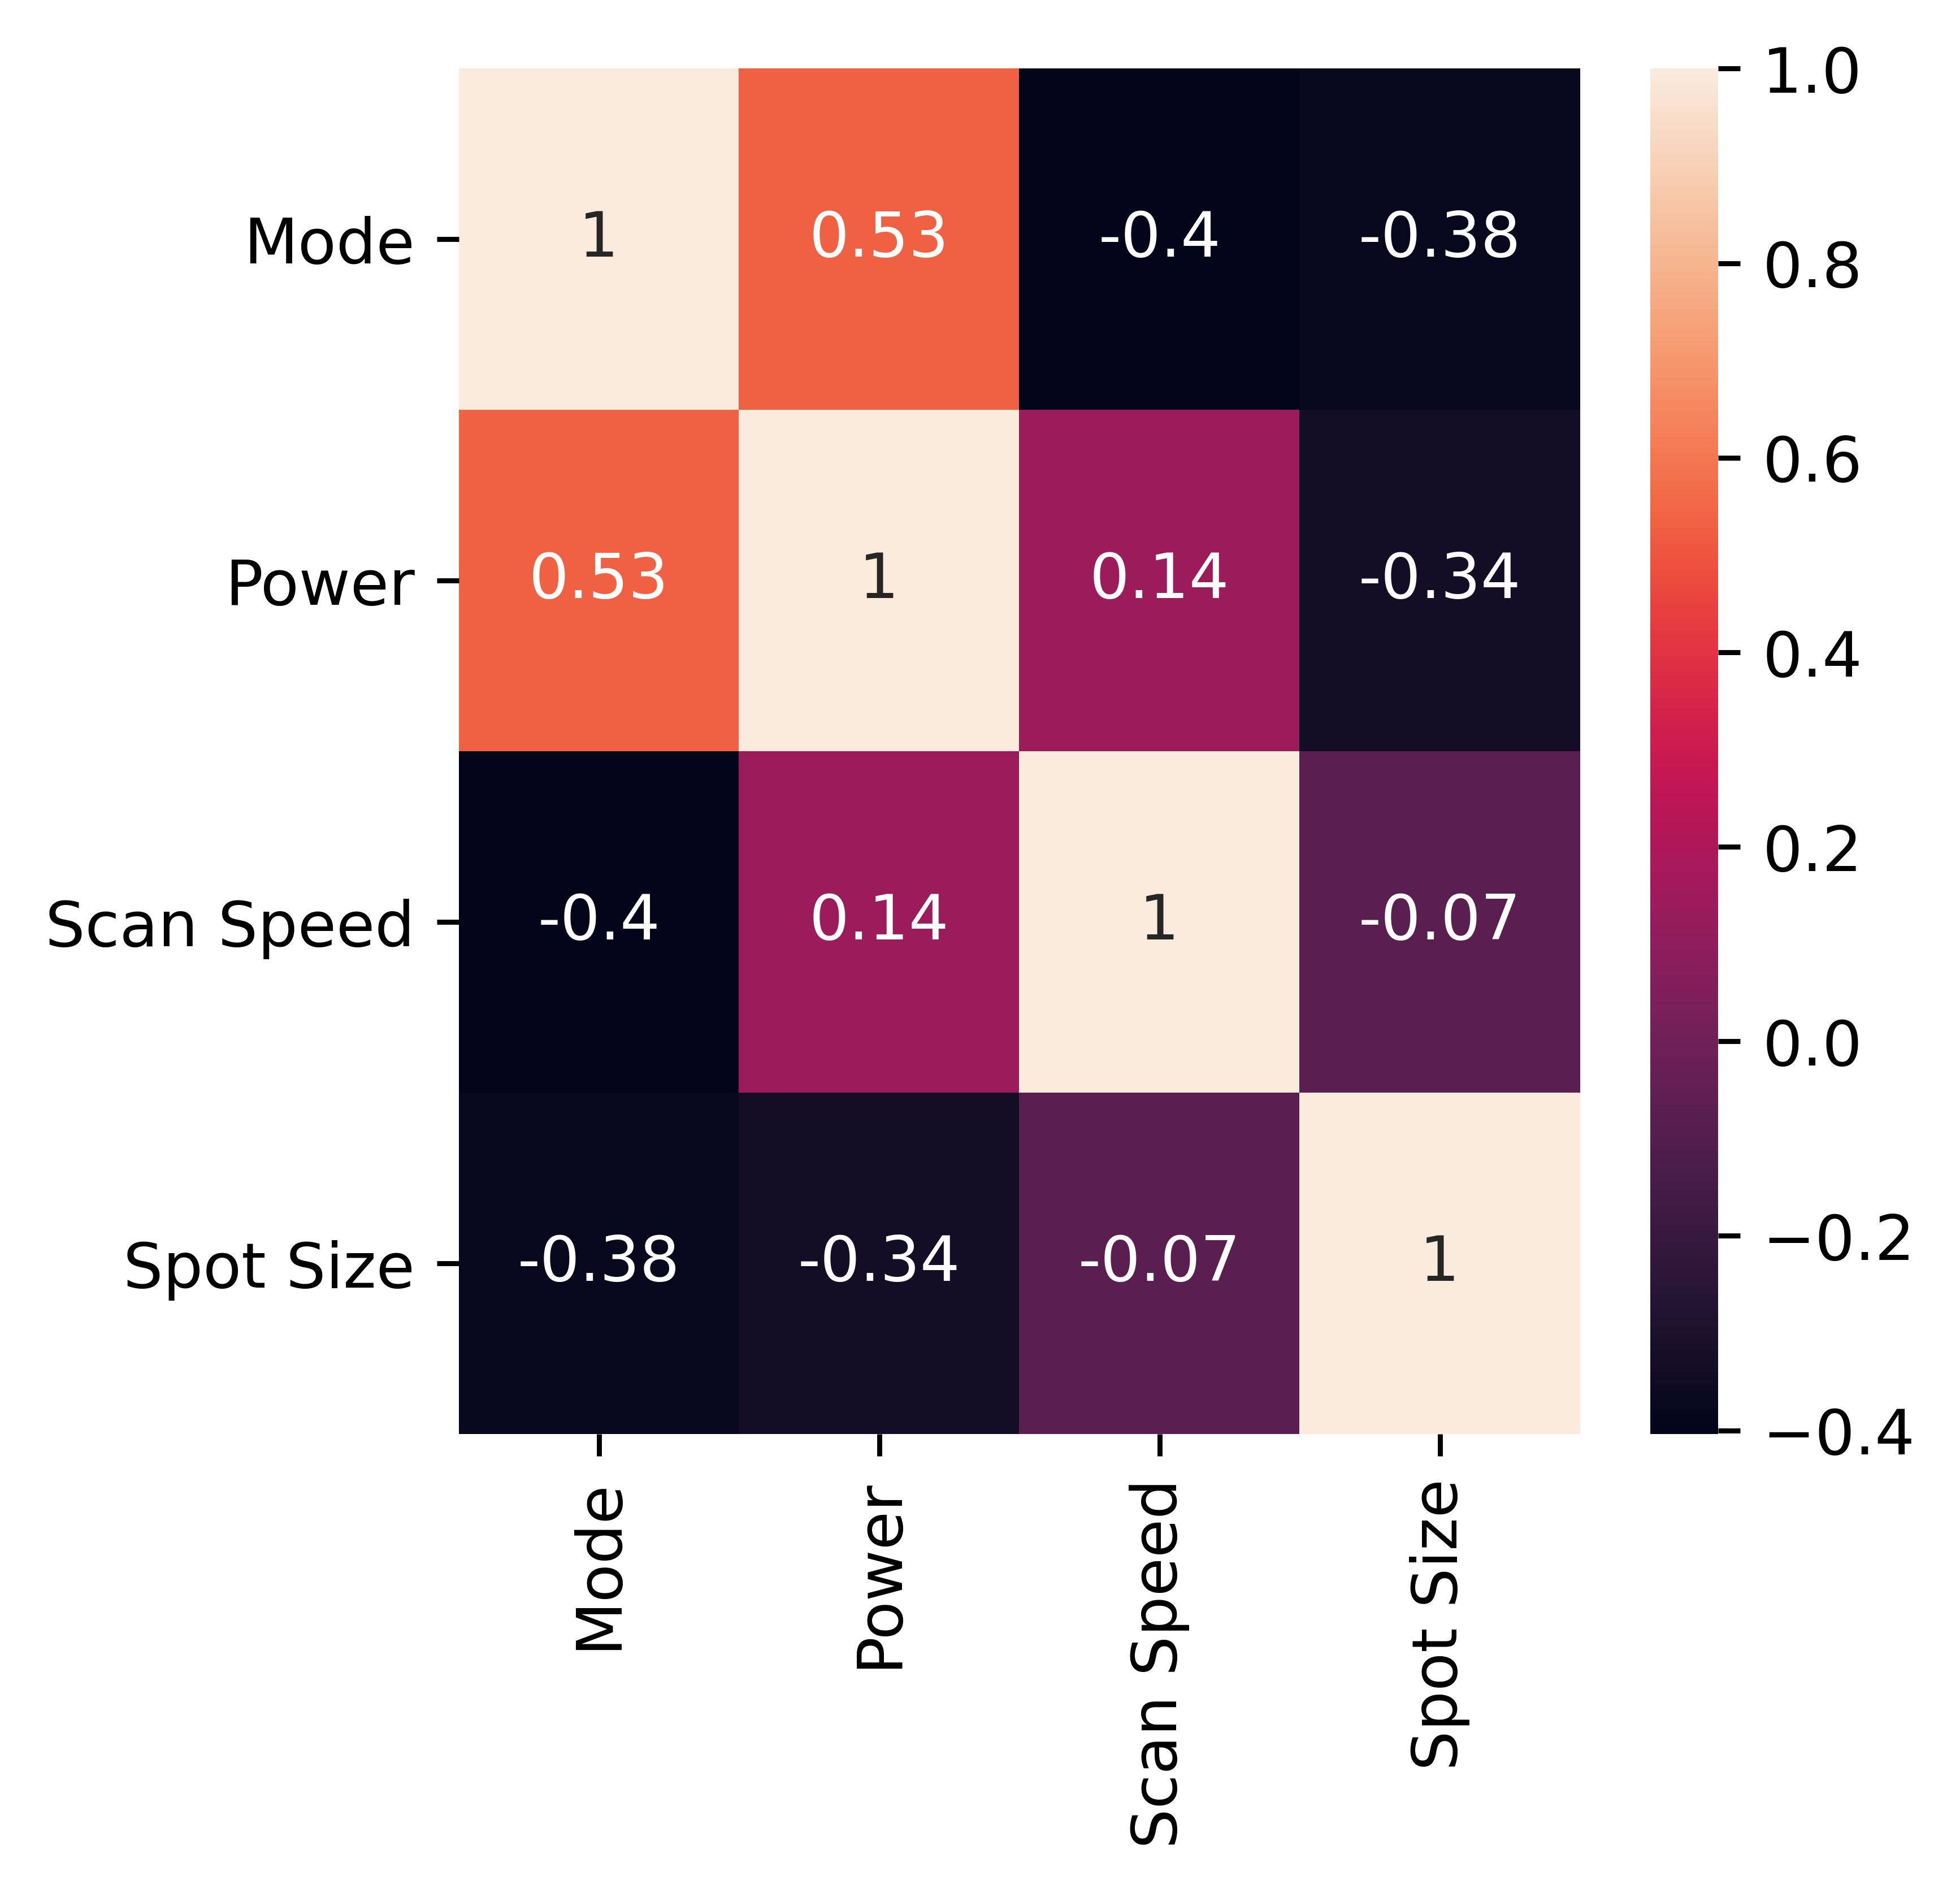

In [5]:
# Corelation Matrix
plt.figure(figsize=(4,4),dpi=800)
sns.heatmap(data1.corr(),annot=True);

In [6]:
from scipy import stats

In [7]:
# Separating input and output features
x = data1.loc[:, data1.columns != 'Mode']  # independent variables

y = data1.loc[:, data1.columns == 'Mode'] 

# Test Train Split
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x,y,test_size=0.2,random_state=70)



In [8]:
# Testing the Random Forest Model
from sklearn.ensemble import RandomForestClassifier
regm= RandomForestClassifier(n_estimators=100,random_state=0)
regm.fit(xtr,ytr)

<ipython-input-8-4ca163339aa1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm.fit(xtr,ytr)


RandomForestClassifier(random_state=0)

In [9]:
regm.score(xtr,ytr)

0.9821428571428571

In [10]:
regm.predict(xte)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [11]:
regm.score(xte,yte)

0.8571428571428571

In [12]:
regm.feature_importances_

array([0.35699195, 0.46546256, 0.17754549])

<function matplotlib.pyplot.show(close=None, block=None)>

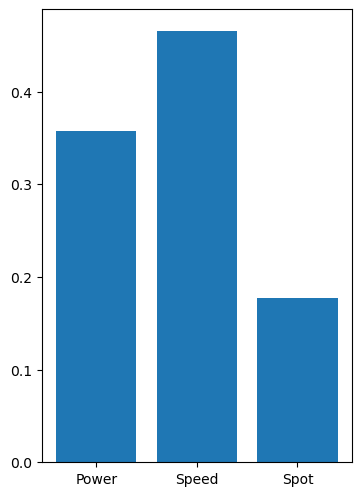

In [13]:
plt.figure(figsize=(4,6),dpi=100)
z=["Power","Speed","Spot"]
plt.bar(z,regm.feature_importances_)
plt.show

In [14]:
from sklearn.metrics import confusion_matrix
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

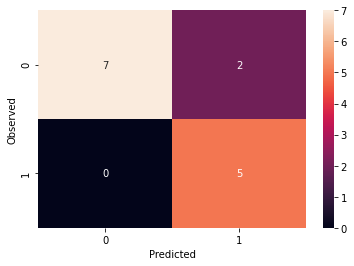

In [15]:
draw_cm(yte,regm.predict(xte));

<ipython-input-16-39527e5e5e2a>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm1.fit(xtr,ytr)
<ipython-input-16-39527e5e5e2a>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm1.fit(xtr,ytr)
<ipython-input-16-39527e5e5e2a>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm1.fit(xtr,ytr)
<ipython-input-16-39527e5e5e2a>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regm1.fit(xtr,ytr)
<ipython-input-16-39527e5e5e2a>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

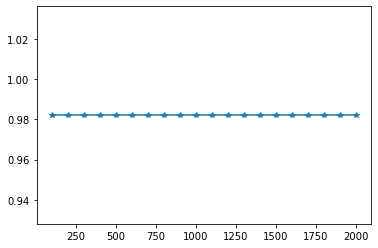

In [16]:
# Random Forest with Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score,roc_curve,accuracy_score
from sklearn.metrics import mean_squared_error
ar=np.zeros(20)
ar1=np.linspace(100,2000,20)
scr=np.zeros(20)
scr1=np.zeros(20)
for i in range(20):
    regm1= RandomForestClassifier(n_estimators=int(ar1[i]),random_state=0)
    regm1.fit(xtr,ytr)
    scr[i]=accuracy_score(ytr,regm1.predict(xtr))
    ypr1=regm1.predict(xtr)
    scr1[i]=recall_score(ytr,ypr1)
plt.plot(ar1,scr,marker='*')

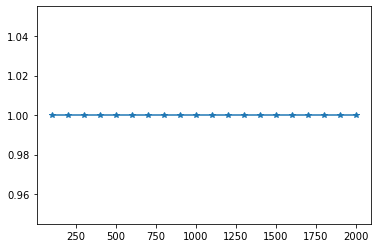

In [17]:
plt.plot(ar1,scr1,marker='*')

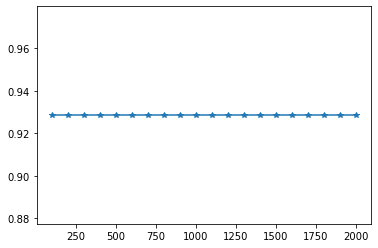

In [18]:
# XGBoost with Hyperparameter Tuning
!pip install xgboost 
from xgboost import XGBClassifier
a=np.zeros(20)
a1=np.linspace(100,2000,20)
sc=np.zeros(20)
sc1=np.zeros(20)
for i in range(20):
    xgb = XGBClassifier(random_state=1,n_estimators=int(a1[i]))
    xgb.fit(xtr,ytr)
    sc[i]=xgb.score(xtr,ytr)
    yp1=xgb.predict(xtr)
    sc1[i]=np.sqrt(mean_squared_error(yp1,ytr))
plt.plot(a1,sc,marker='*')


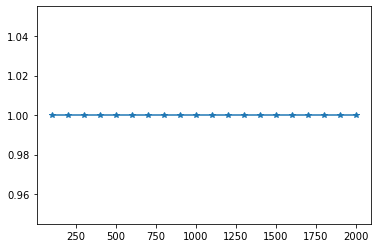

In [19]:
plt.plot(ar1,scr1,marker='*')

In [20]:
xgb = XGBClassifier(random_state=1,n_estimators=1250)
xgb.fit(xtr,ytr)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [21]:
xgb.score(xtr,ytr)

0.9285714285714286

In [22]:
xgb.predict(xte)

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [23]:
xgb.score(xte,yte)

0.7857142857142857

In [24]:
xgb.feature_importances_

array([0.46462706, 0.32255775, 0.21281523], dtype=float32)

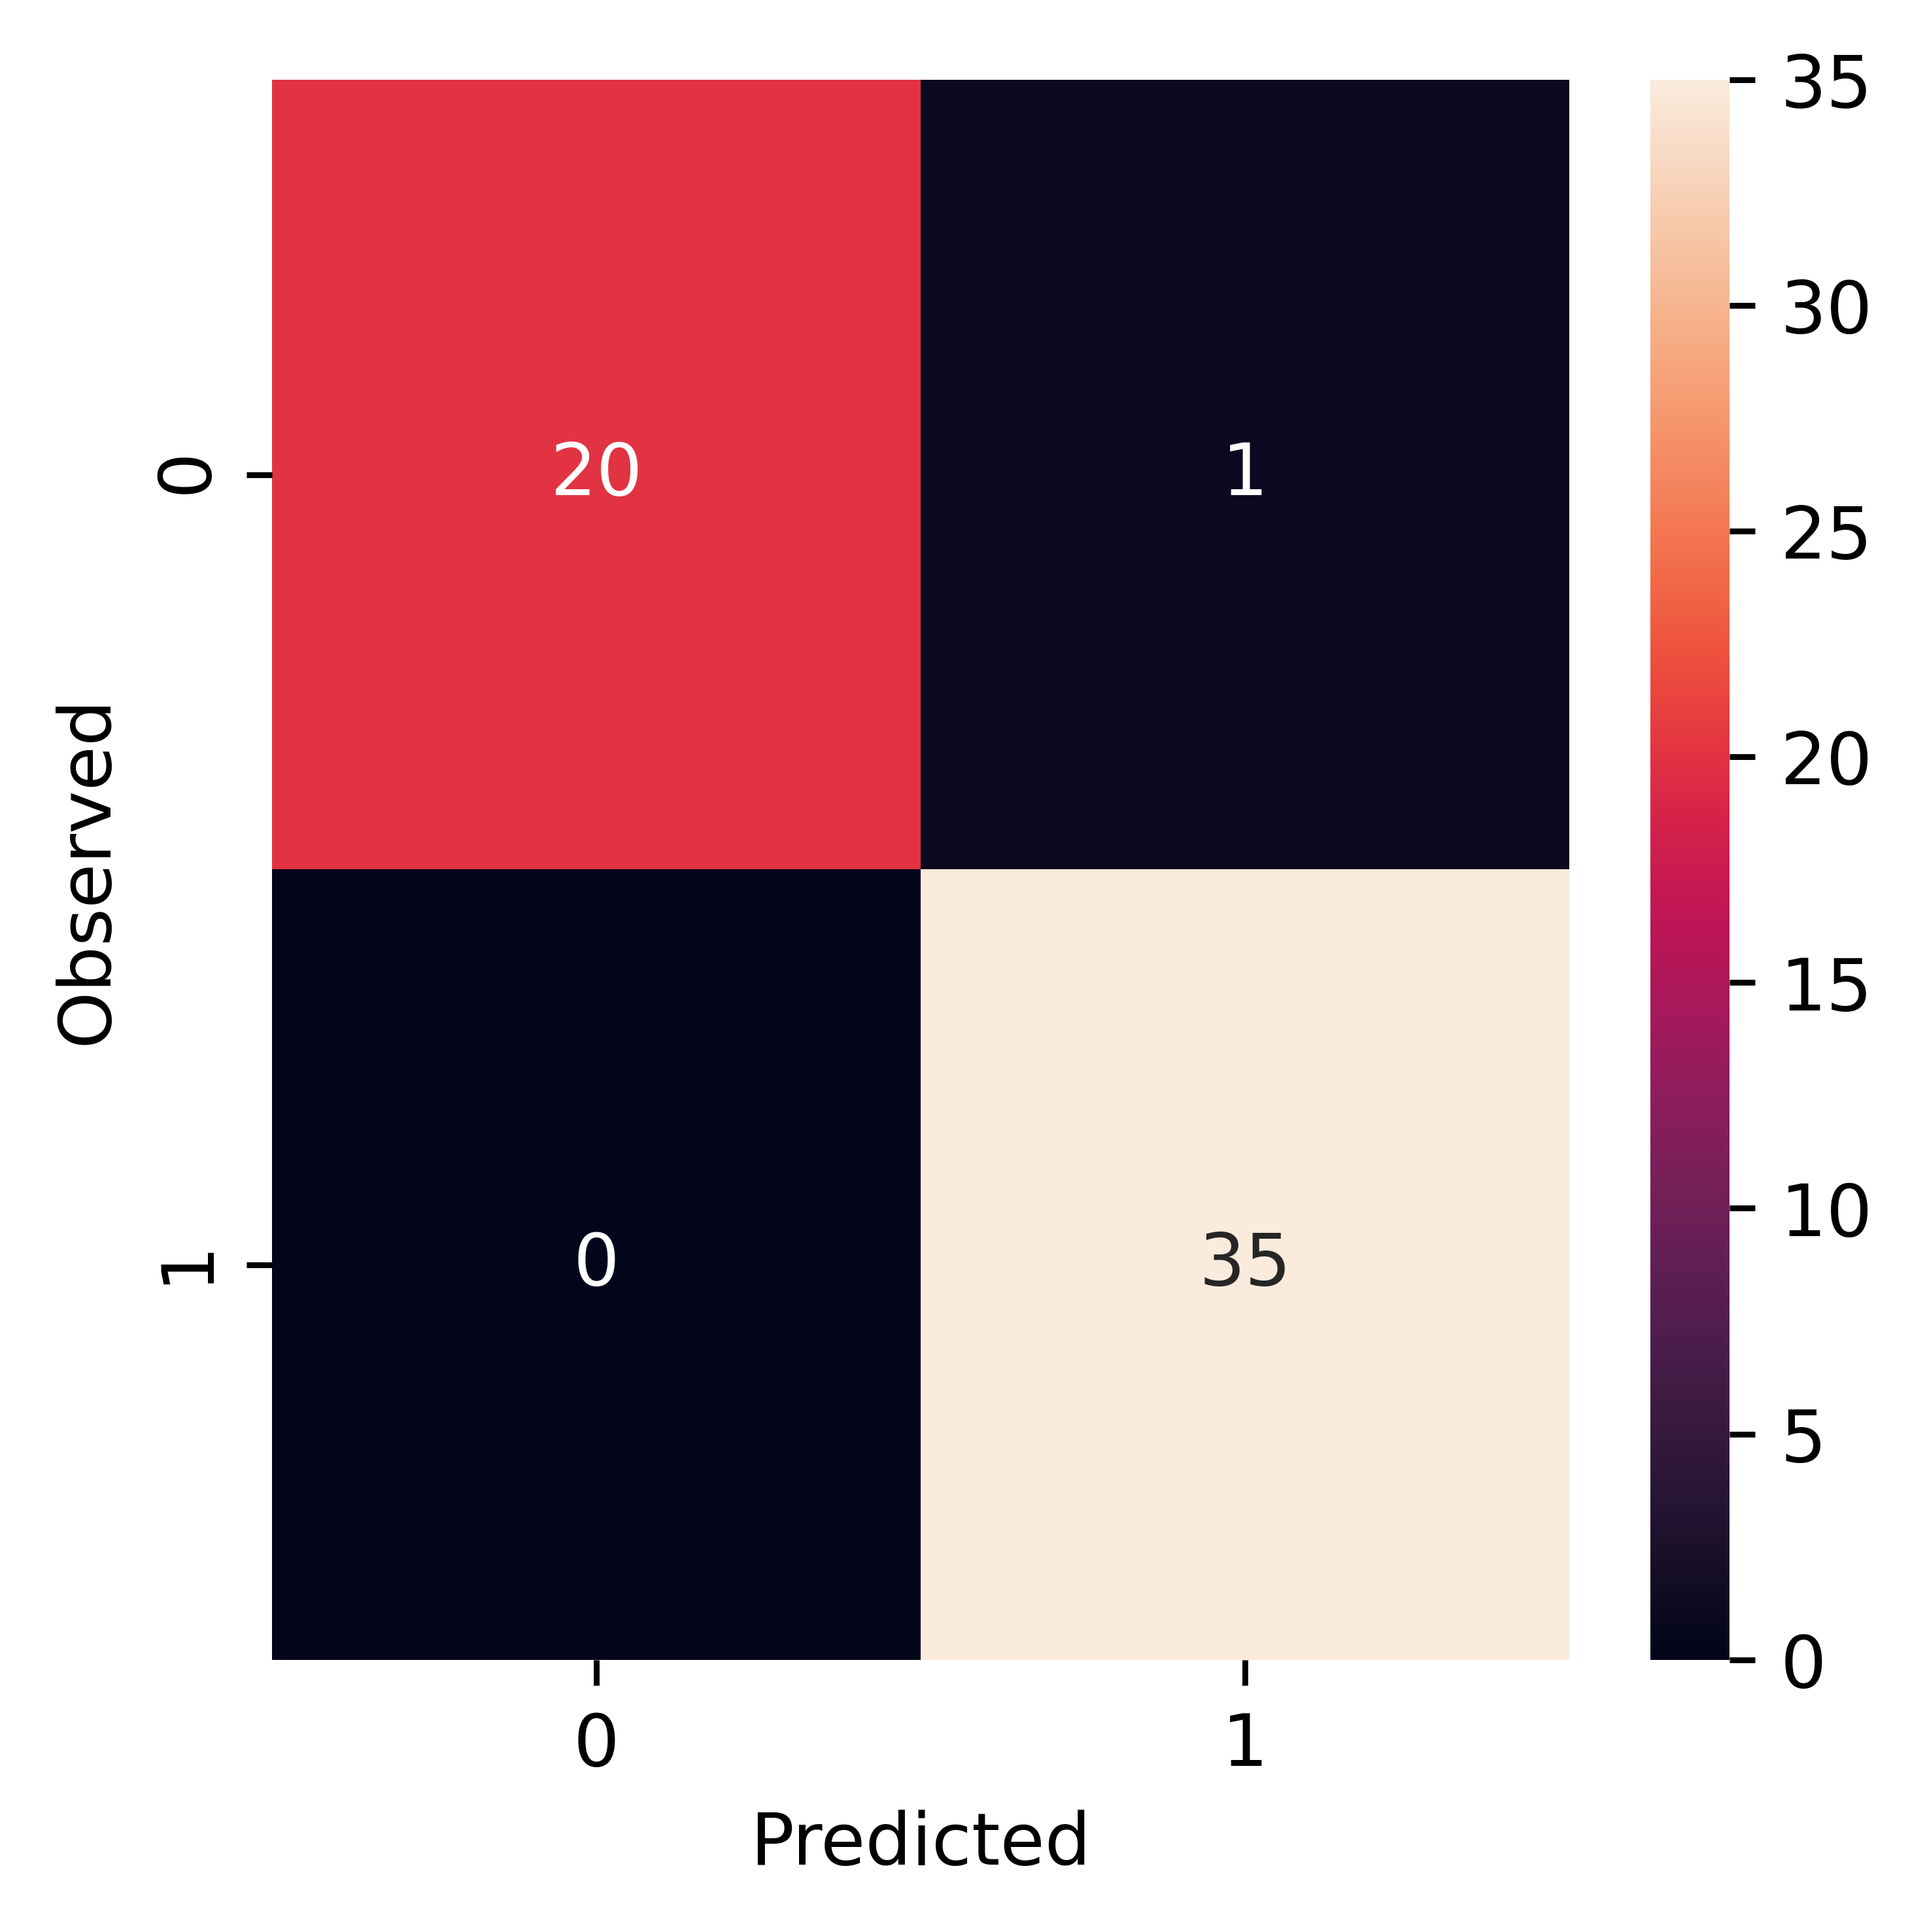

In [25]:
# Confusion Matrix for RF Training Data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(ytr,regm.predict(xtr));

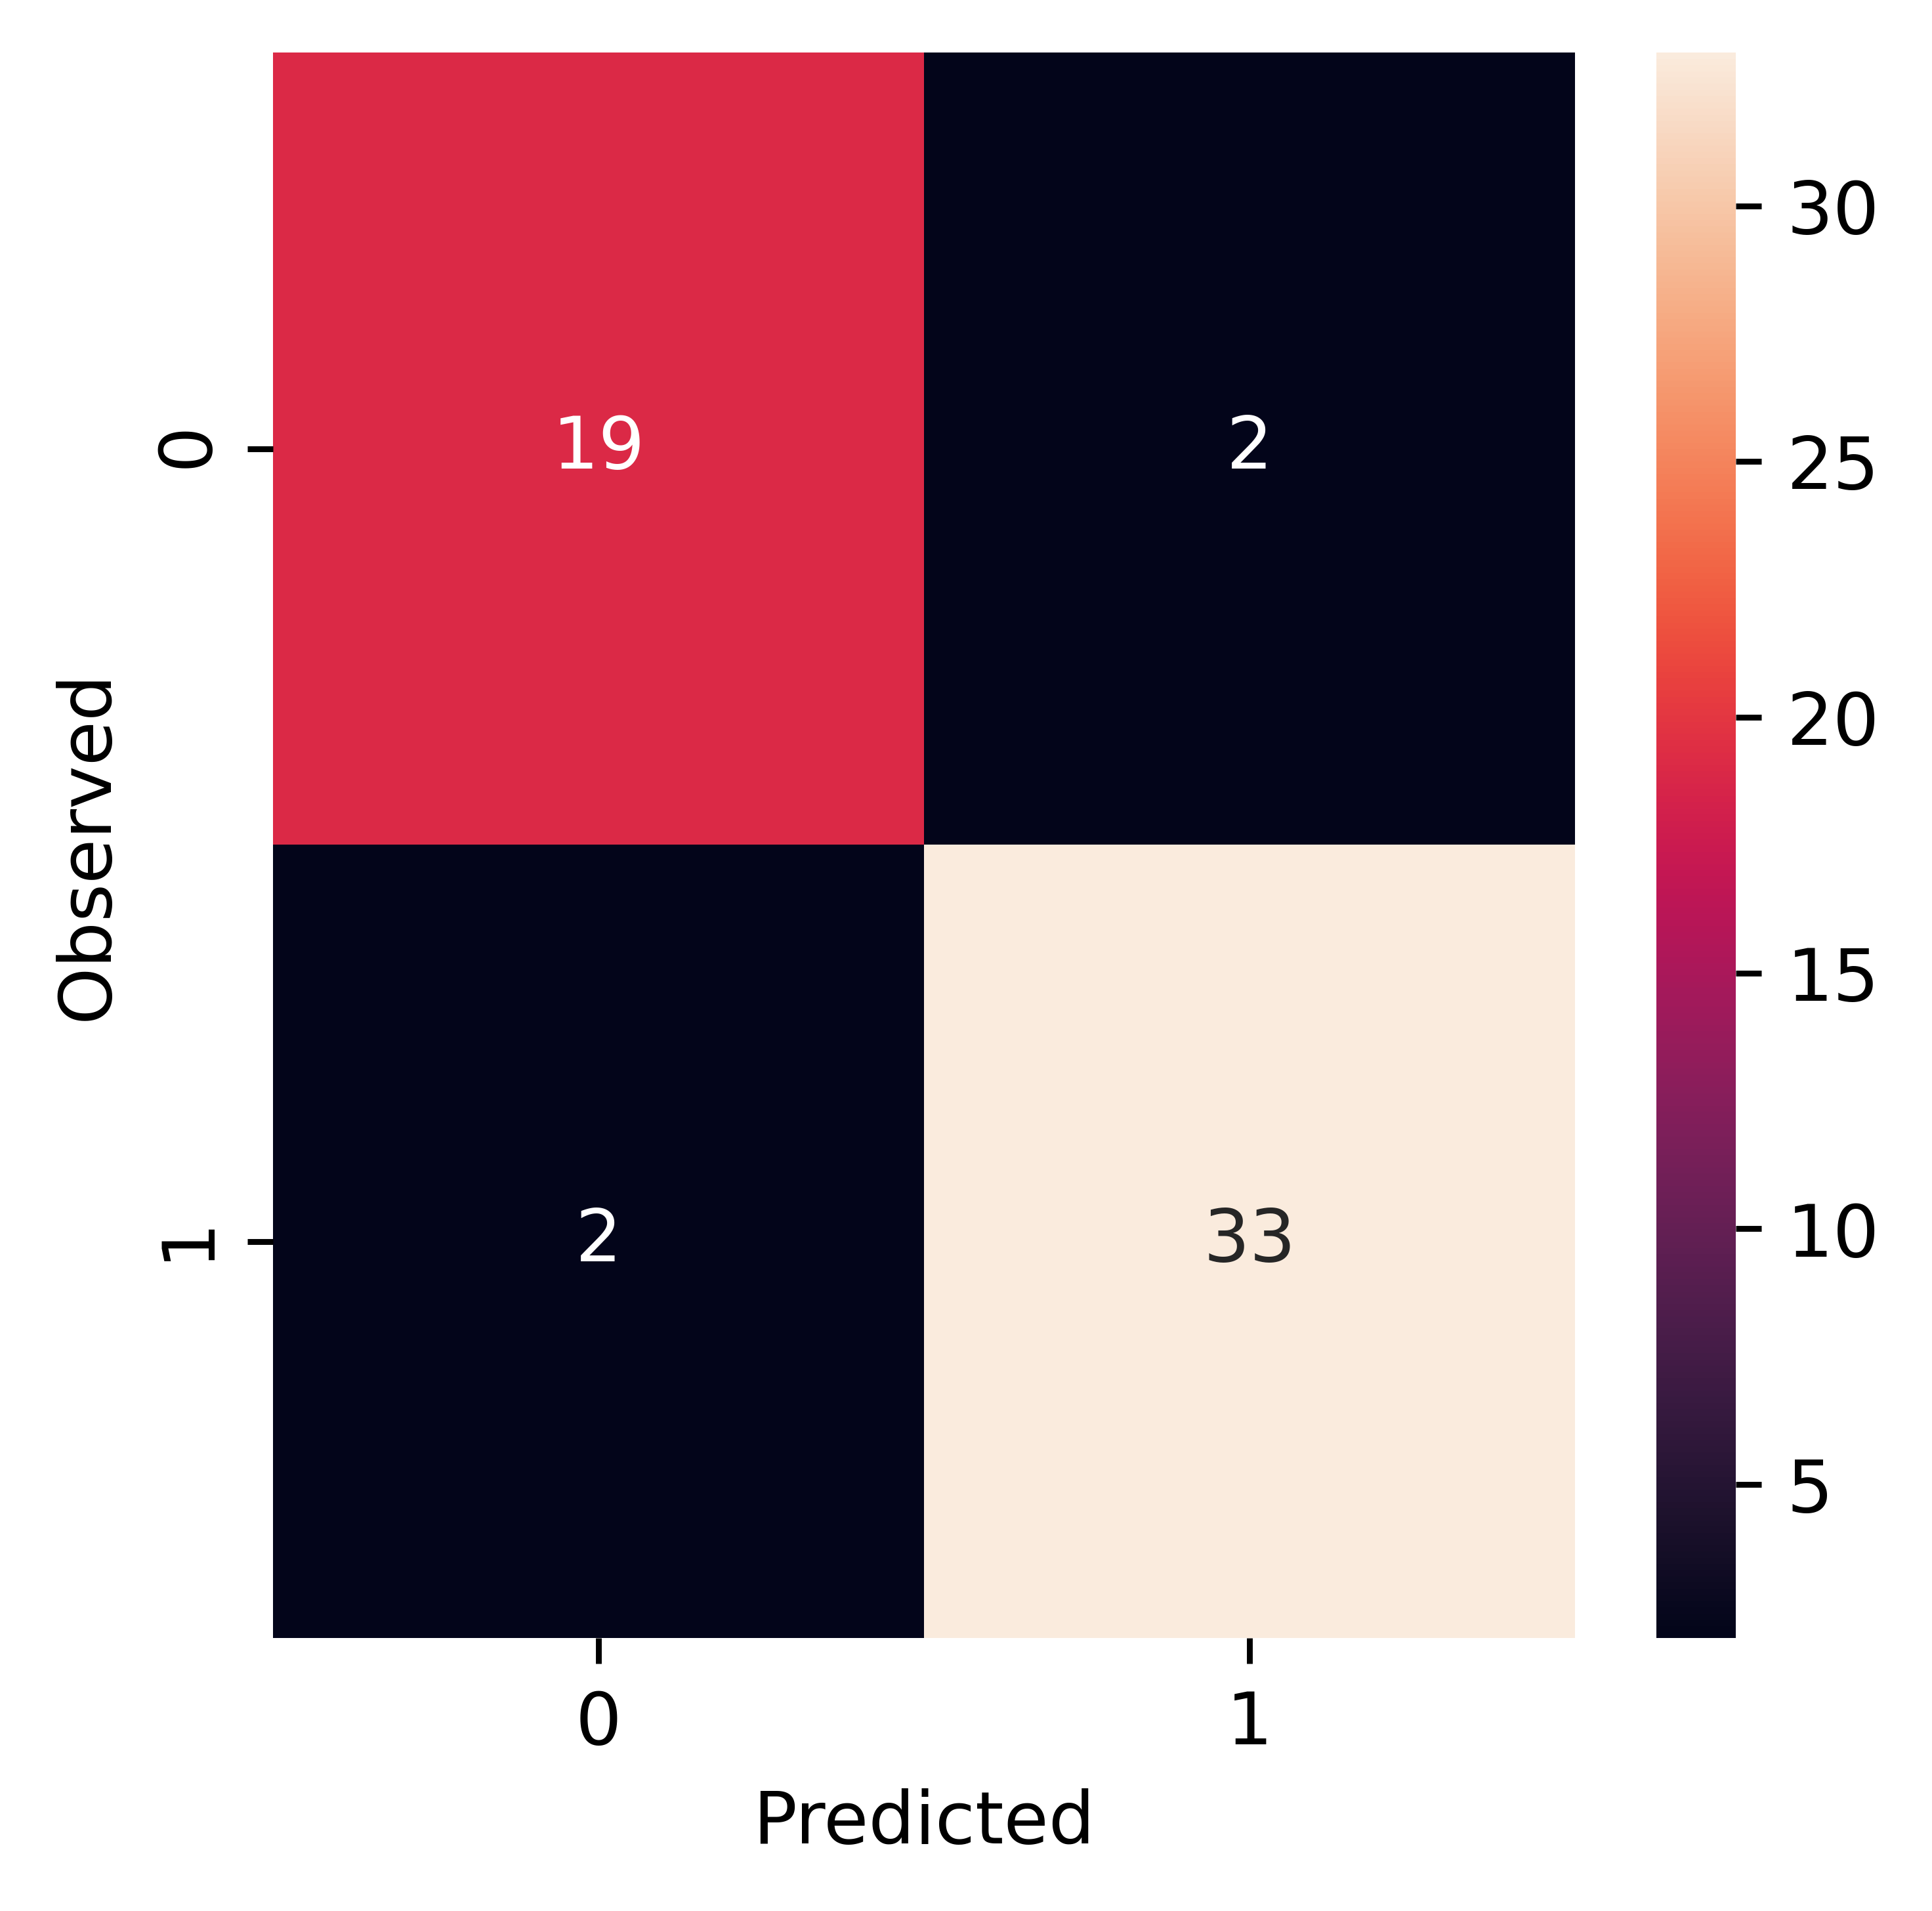

In [26]:
# Confusion Matrix for XGBoost Training data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(ytr,xgb.predict(xtr));

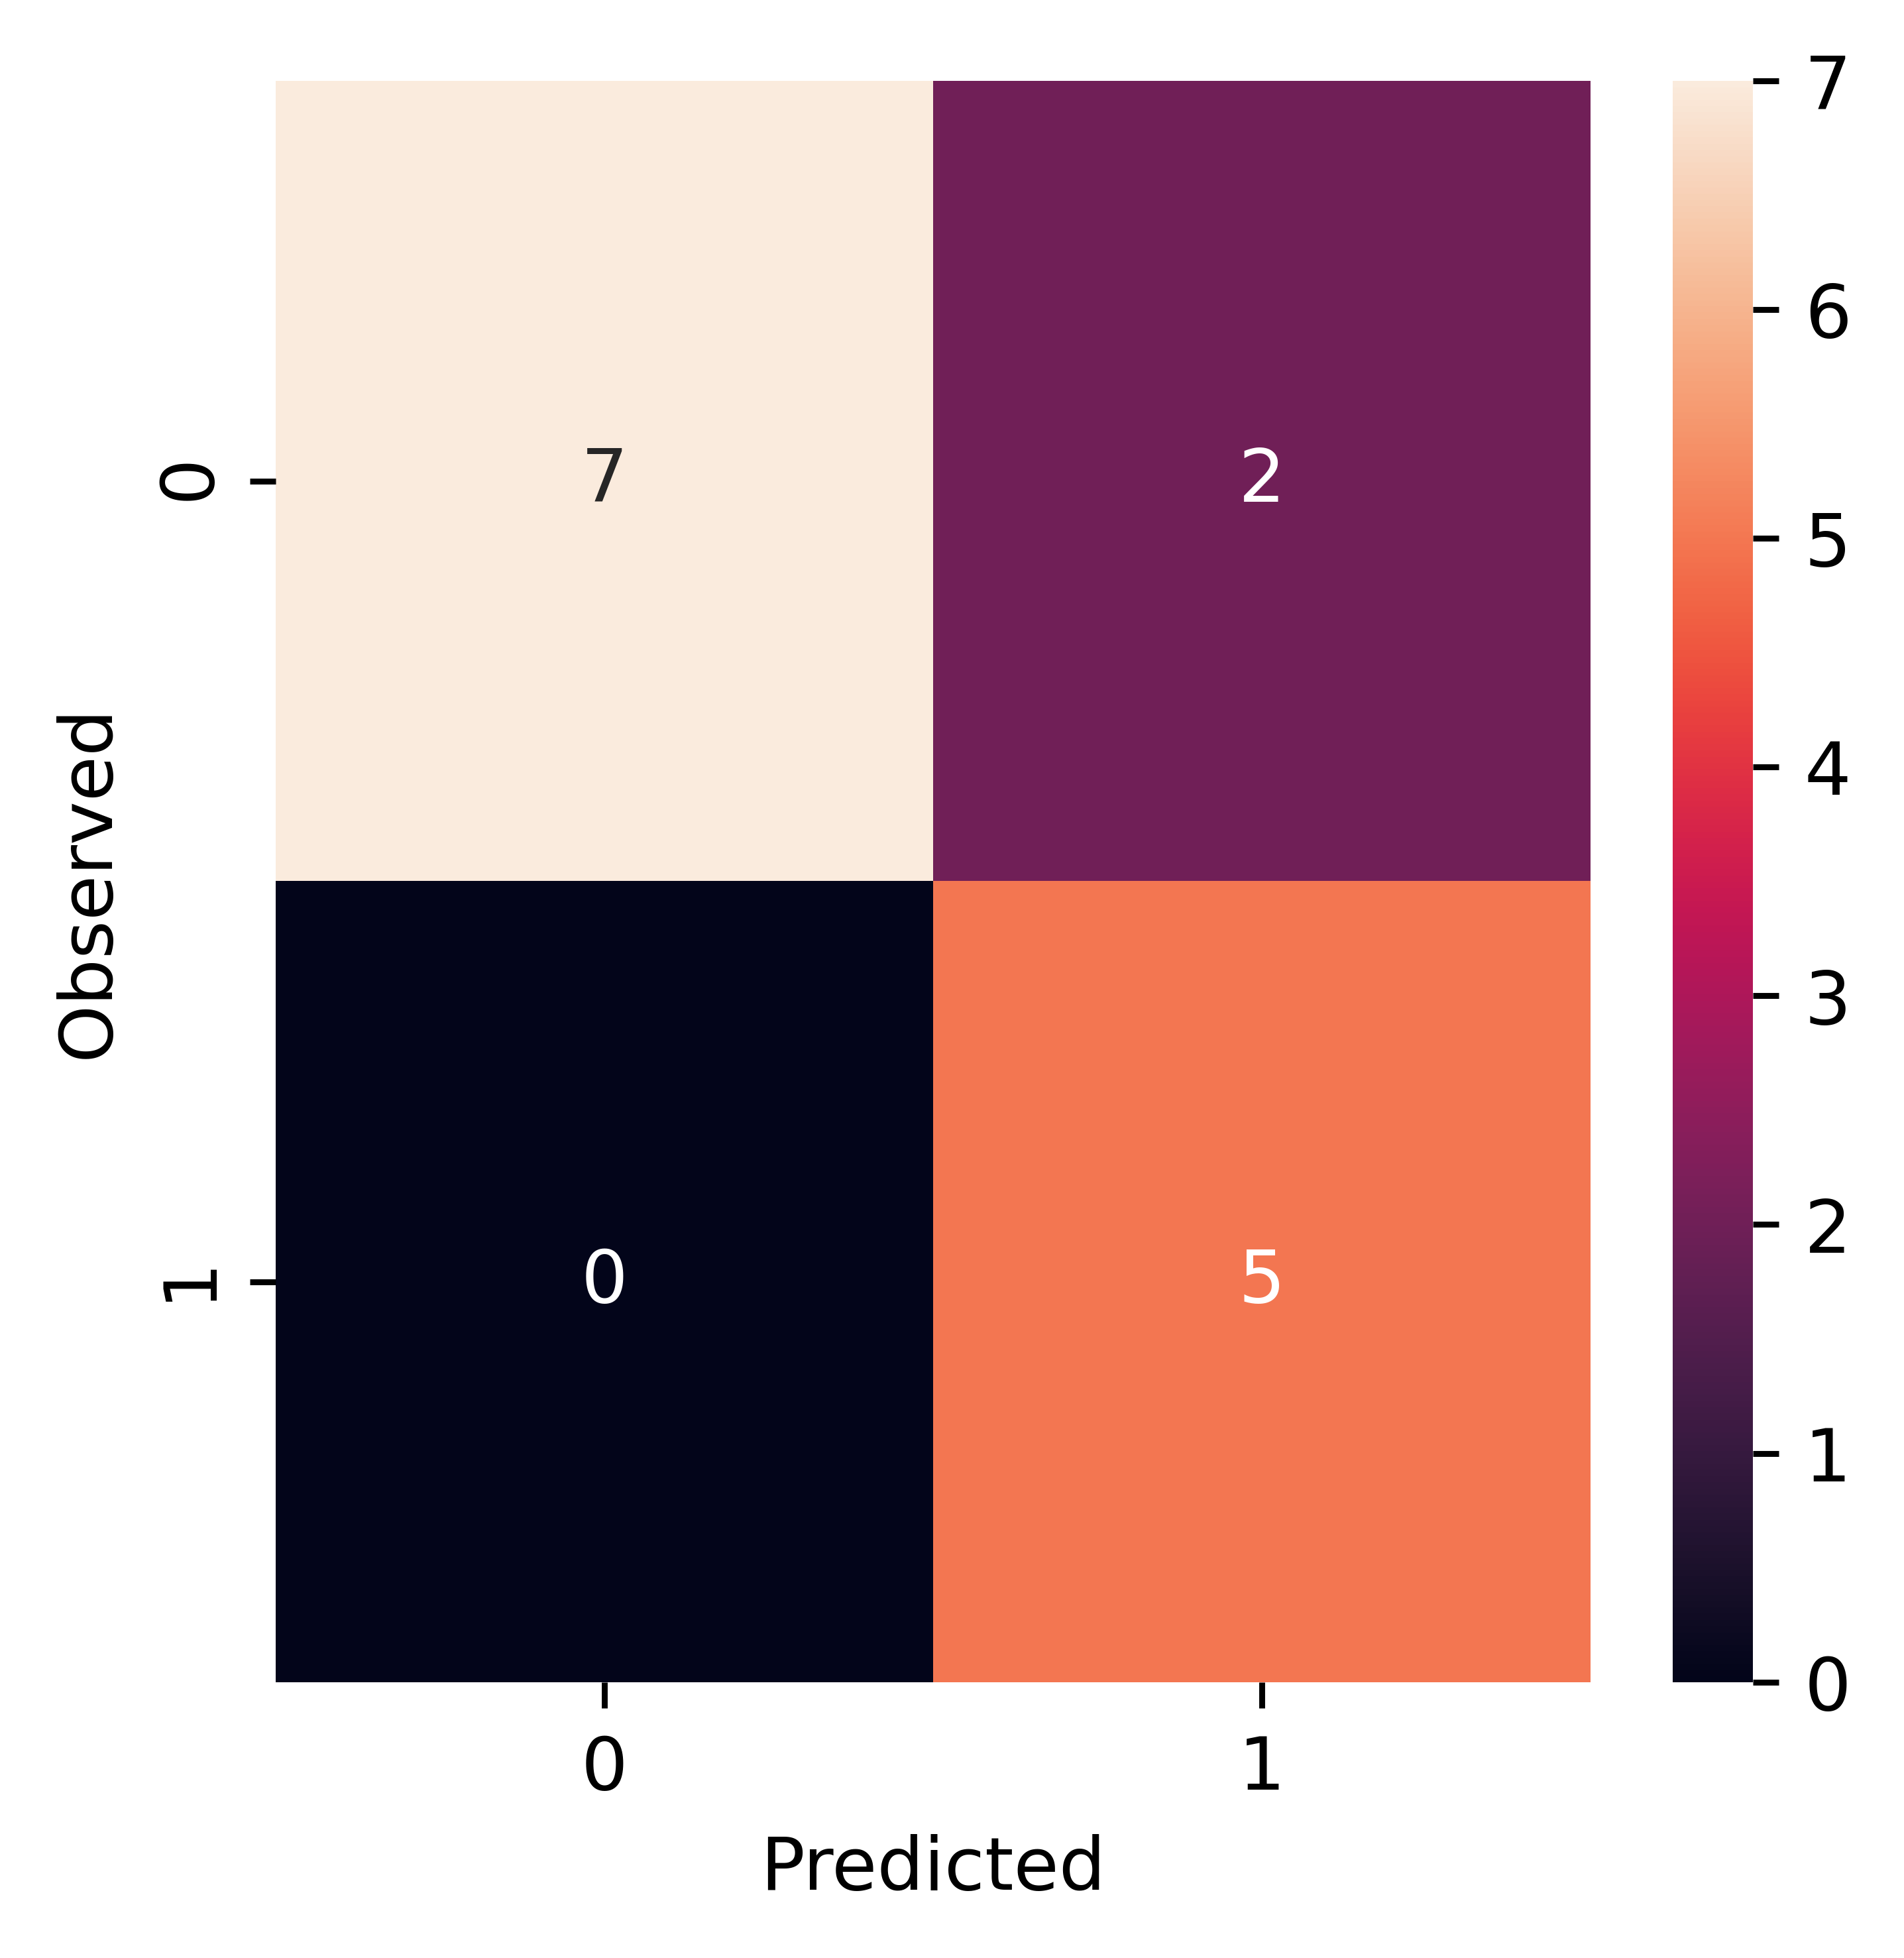

In [27]:
# Confusion Matrix for RF Test Data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(yte,regm.predict(xte));

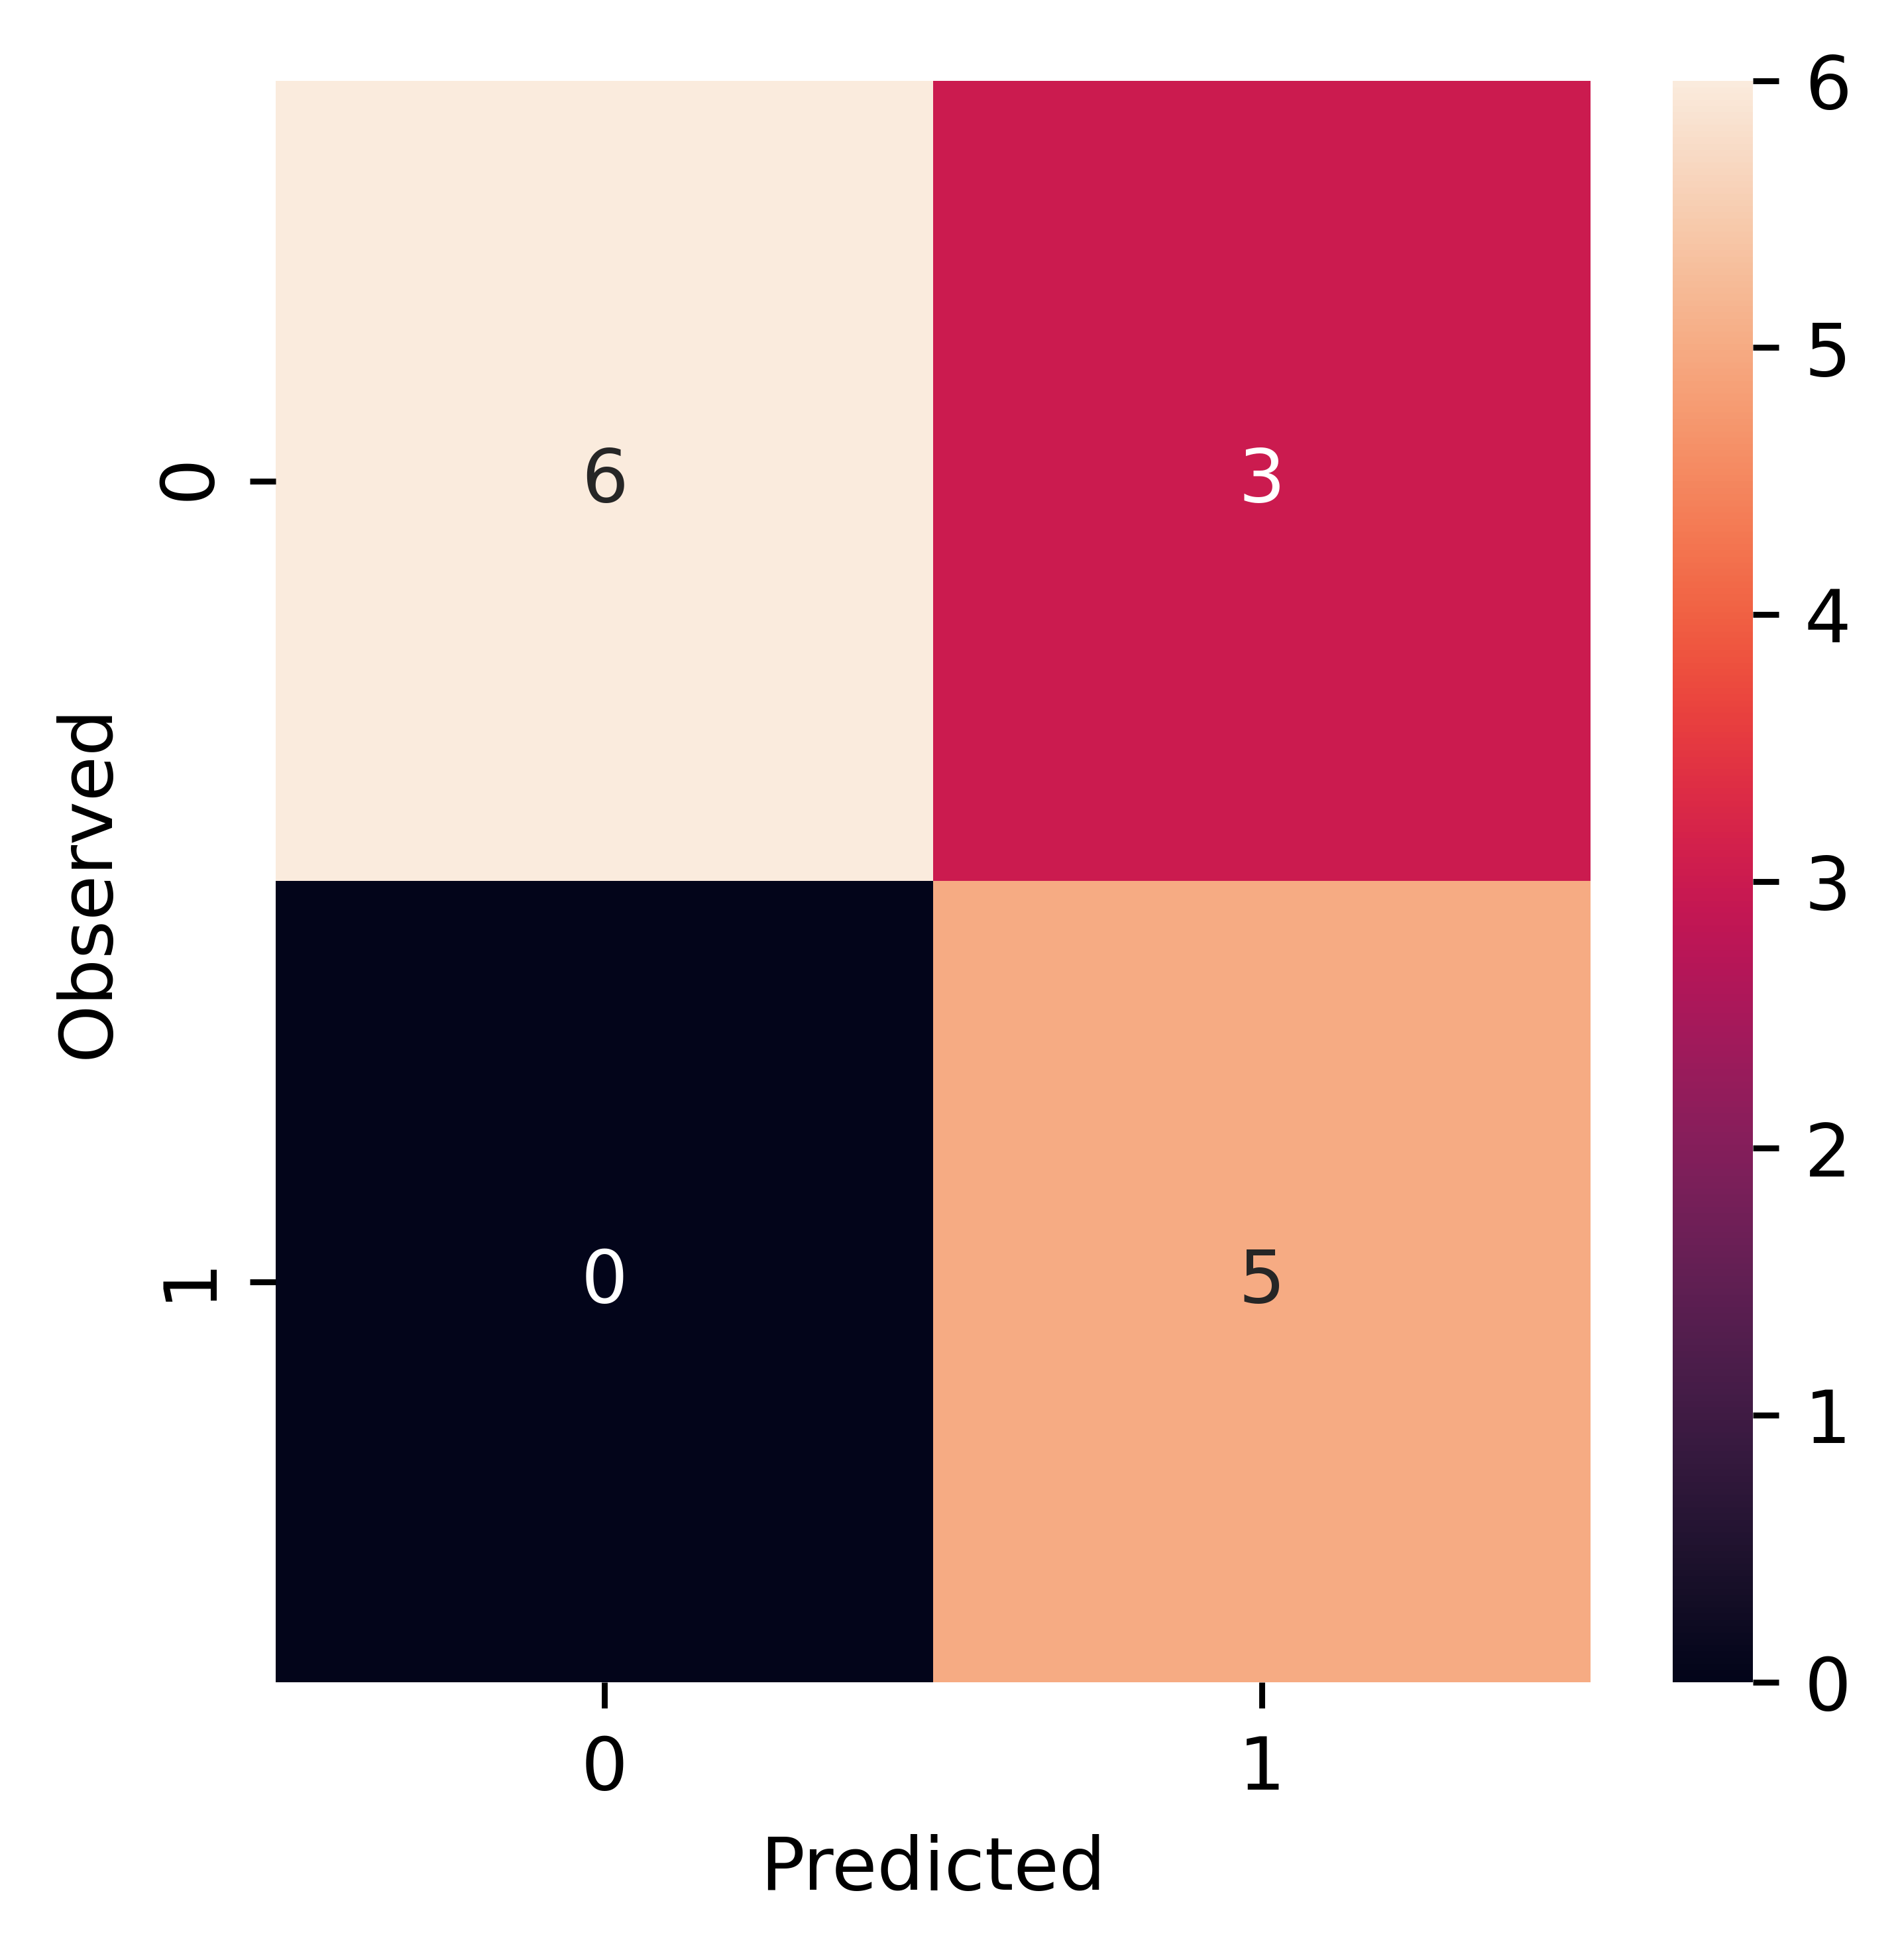

In [28]:
# Confusion Matrix for XGBoost Test data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(yte,xgb.predict(xte));

In [29]:
print(accuracy_score(ytr,regm1.predict(xtr)))
print(accuracy_score(yte,regm1.predict(xte)))
print(accuracy_score(ytr,xgb.predict(xtr)))
print(accuracy_score(yte,xgb.predict(xte)))


0.9821428571428571
0.8571428571428571
0.9285714285714286
0.7857142857142857


In [30]:
print(recall_score(ytr,regm1.predict(xtr)))
print(recall_score(yte,regm1.predict(xte)))
print(recall_score(ytr,xgb.predict(xtr)))
print(recall_score(yte,xgb.predict(xte)))

1.0
1.0
0.9428571428571428
1.0


In [31]:
print(f1_score(ytr,regm1.predict(xtr)))
print(f1_score(yte,regm1.predict(xte)))
print(f1_score(ytr,xgb.predict(xtr)))
print(f1_score(yte,xgb.predict(xte)))

0.9859154929577464
0.8333333333333333
0.9428571428571428
0.7692307692307693


In [32]:
print(precision_score(ytr,regm1.predict(xtr)))
print(precision_score(yte,regm1.predict(xte)))
print(precision_score(ytr,xgb.predict(xtr)))
print(precision_score(yte,xgb.predict(xte)))

0.9722222222222222
0.7142857142857143
0.9428571428571428
0.625


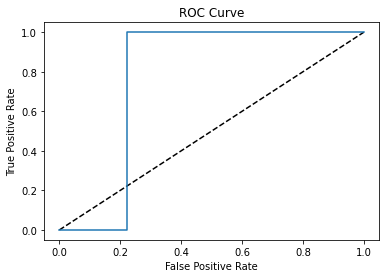

In [33]:
y_pred_prob=regm1.predict_proba(xte)
fpr, tpr, thresholds =roc_curve(yte, y_pred_prob[:,1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<AxesSubplot:xlabel='Mode', ylabel='count'>

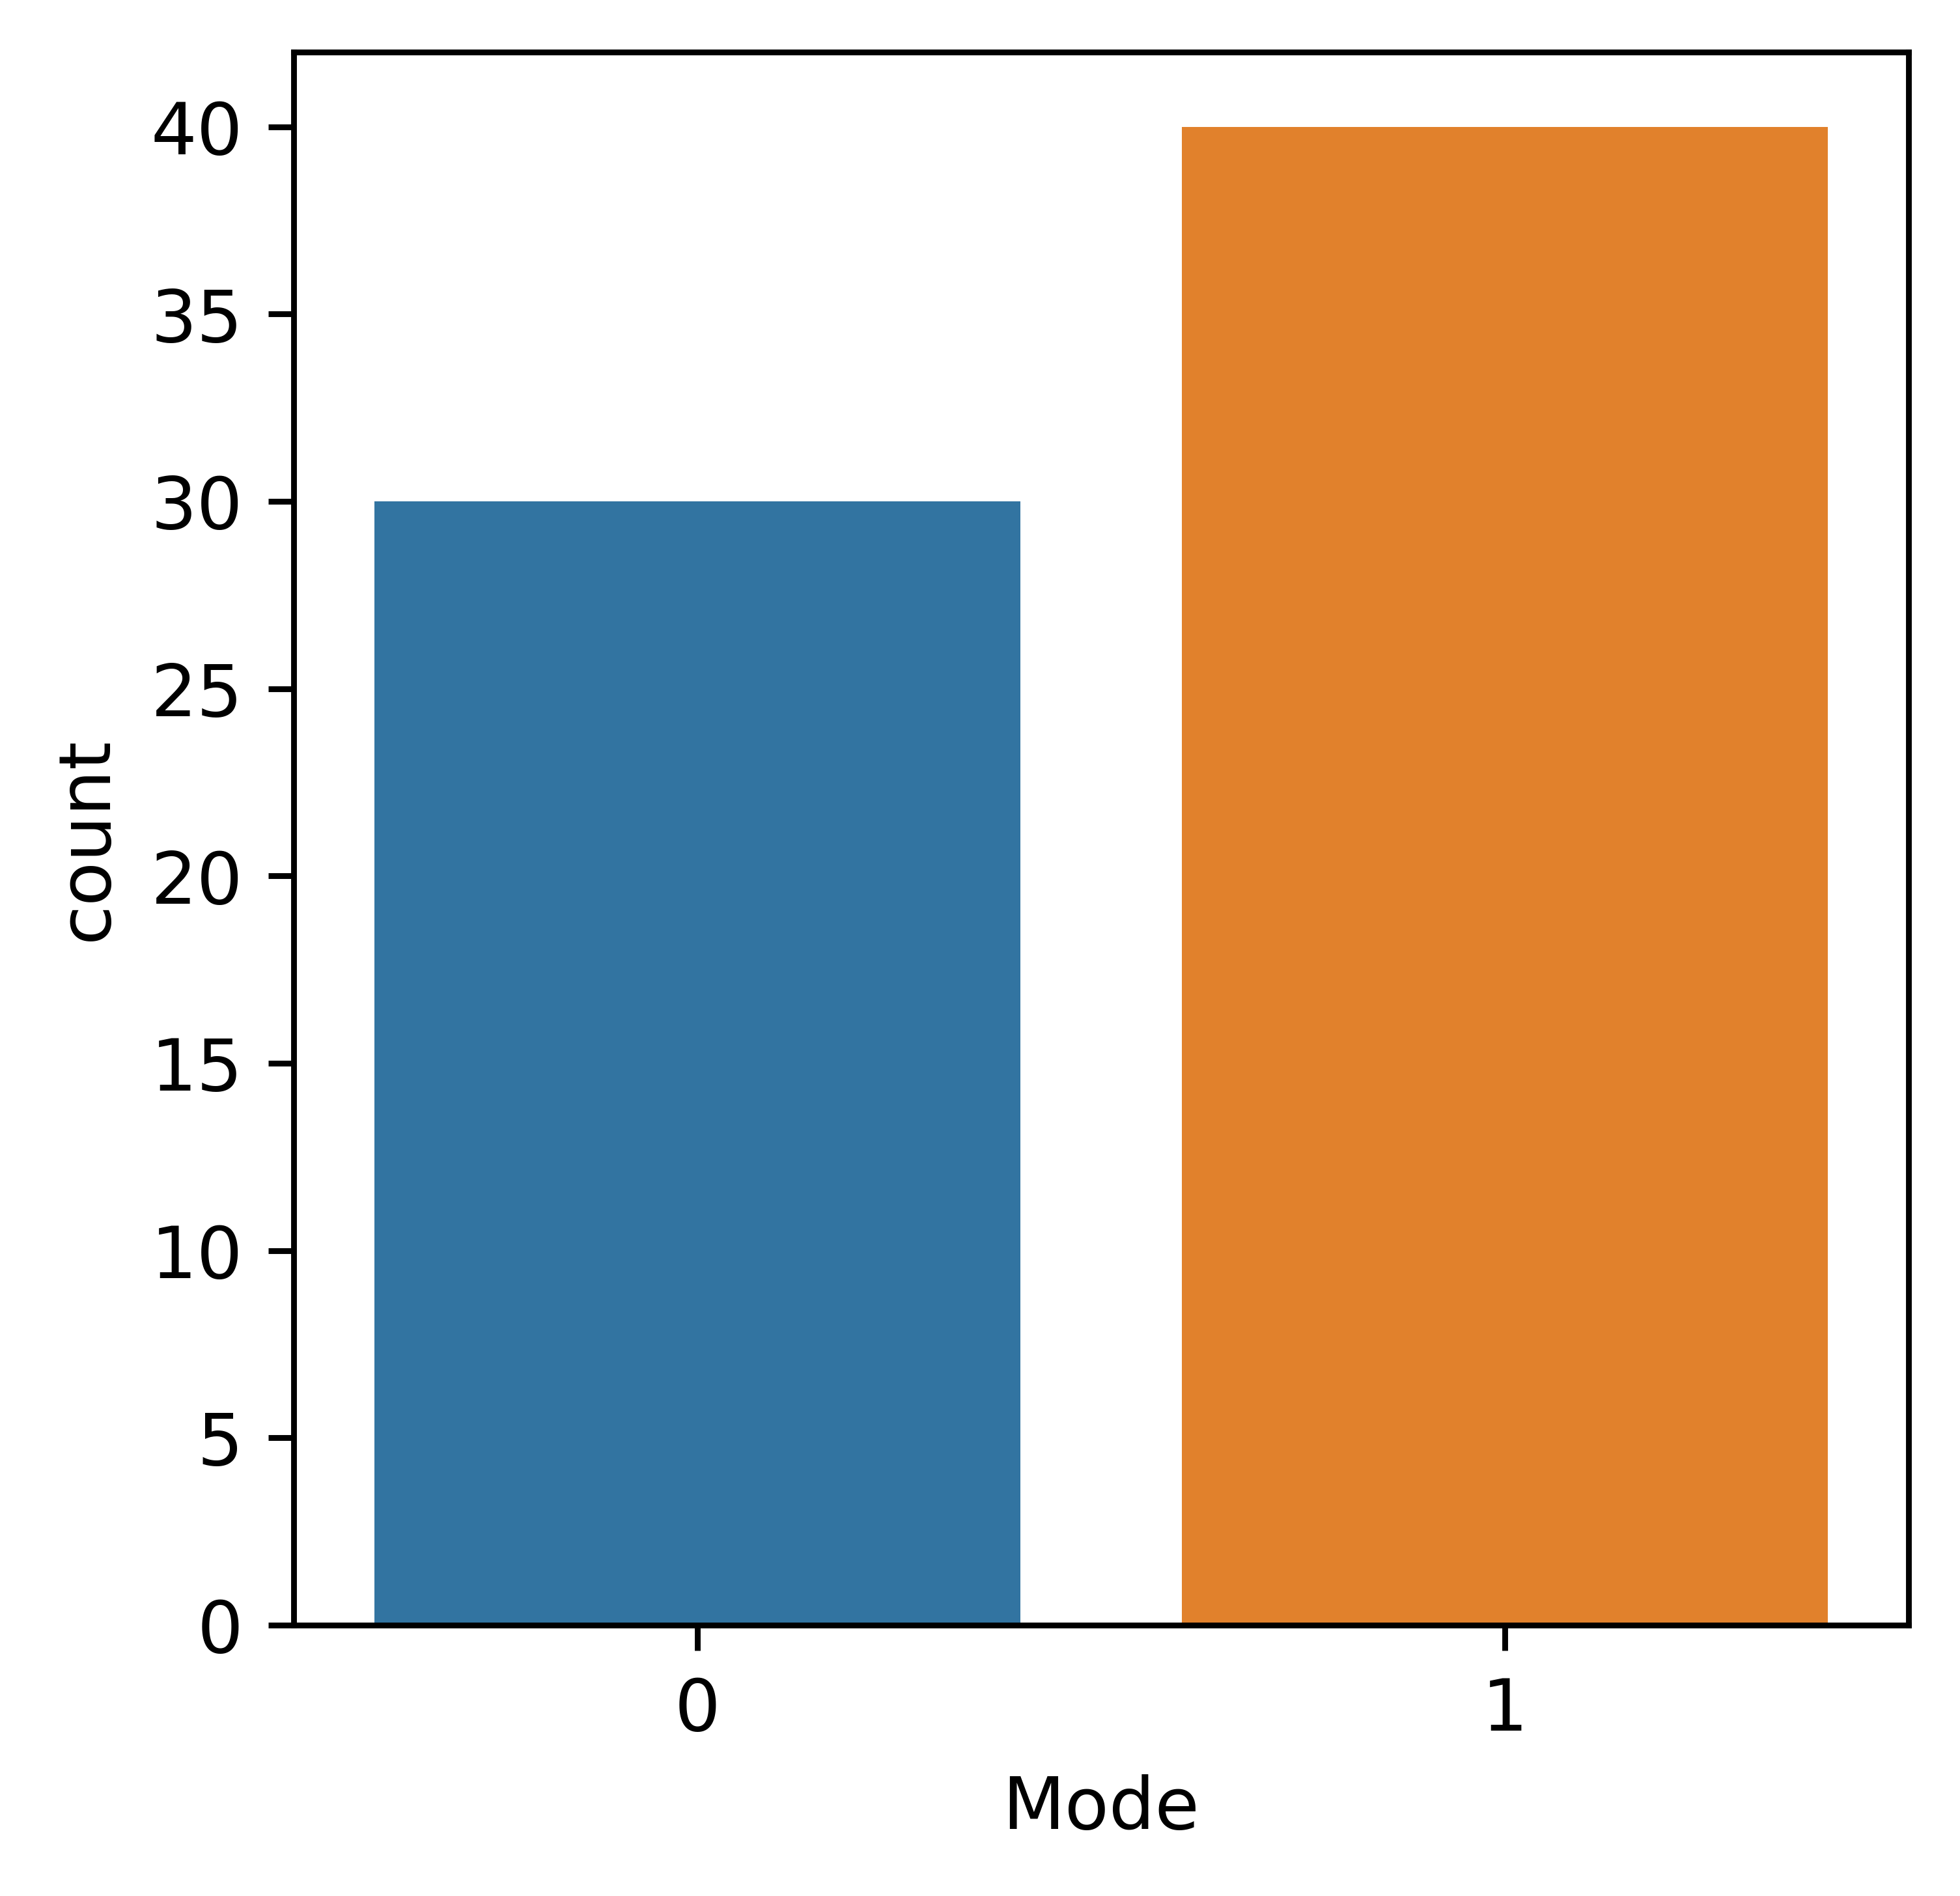

In [34]:
plt.figure(figsize=(4,4),dpi=800)
sns.countplot(x='Mode',data=data1)

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=7)

lr.fit(xtr, ytr)

M:\ANACONDA\SETUP\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=7)

In [36]:
lr.predict(xte)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [37]:
lr.score(xtr,ytr)

0.9107142857142857

In [38]:
lr.score(xte,yte)

0.7142857142857143

In [39]:
print(accuracy_score(ytr,lr.predict(xtr)))
print(accuracy_score(yte,lr.predict(xte)))

0.9107142857142857
0.7142857142857143


In [40]:
print(recall_score(ytr,lr.predict(xtr)))
print(recall_score(yte,lr.predict(xte)))

0.9428571428571428
1.0


In [41]:
print(f1_score(ytr,lr.predict(xtr)))
print(f1_score(yte,lr.predict(xte)))

0.9295774647887323
0.7142857142857143


In [42]:
print(precision_score(ytr,lr.predict(xtr)))
print(precision_score(yte,lr.predict(xte)))

0.9166666666666666
0.5555555555555556


In [43]:
lr.coef_

array([[ 0.01898835, -0.00238014, -0.04496643]])

In [44]:
# Importing data for prediction
pm=pd.read_csv('PMD.csv')

In [45]:
regm1.predict(pm)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
xgb.predict(pm)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
pm75=pd.read_csv('PMD75.csv')
pm100=pd.read_csv('PMD100.csv')

In [48]:
regm1.predict(pm100)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

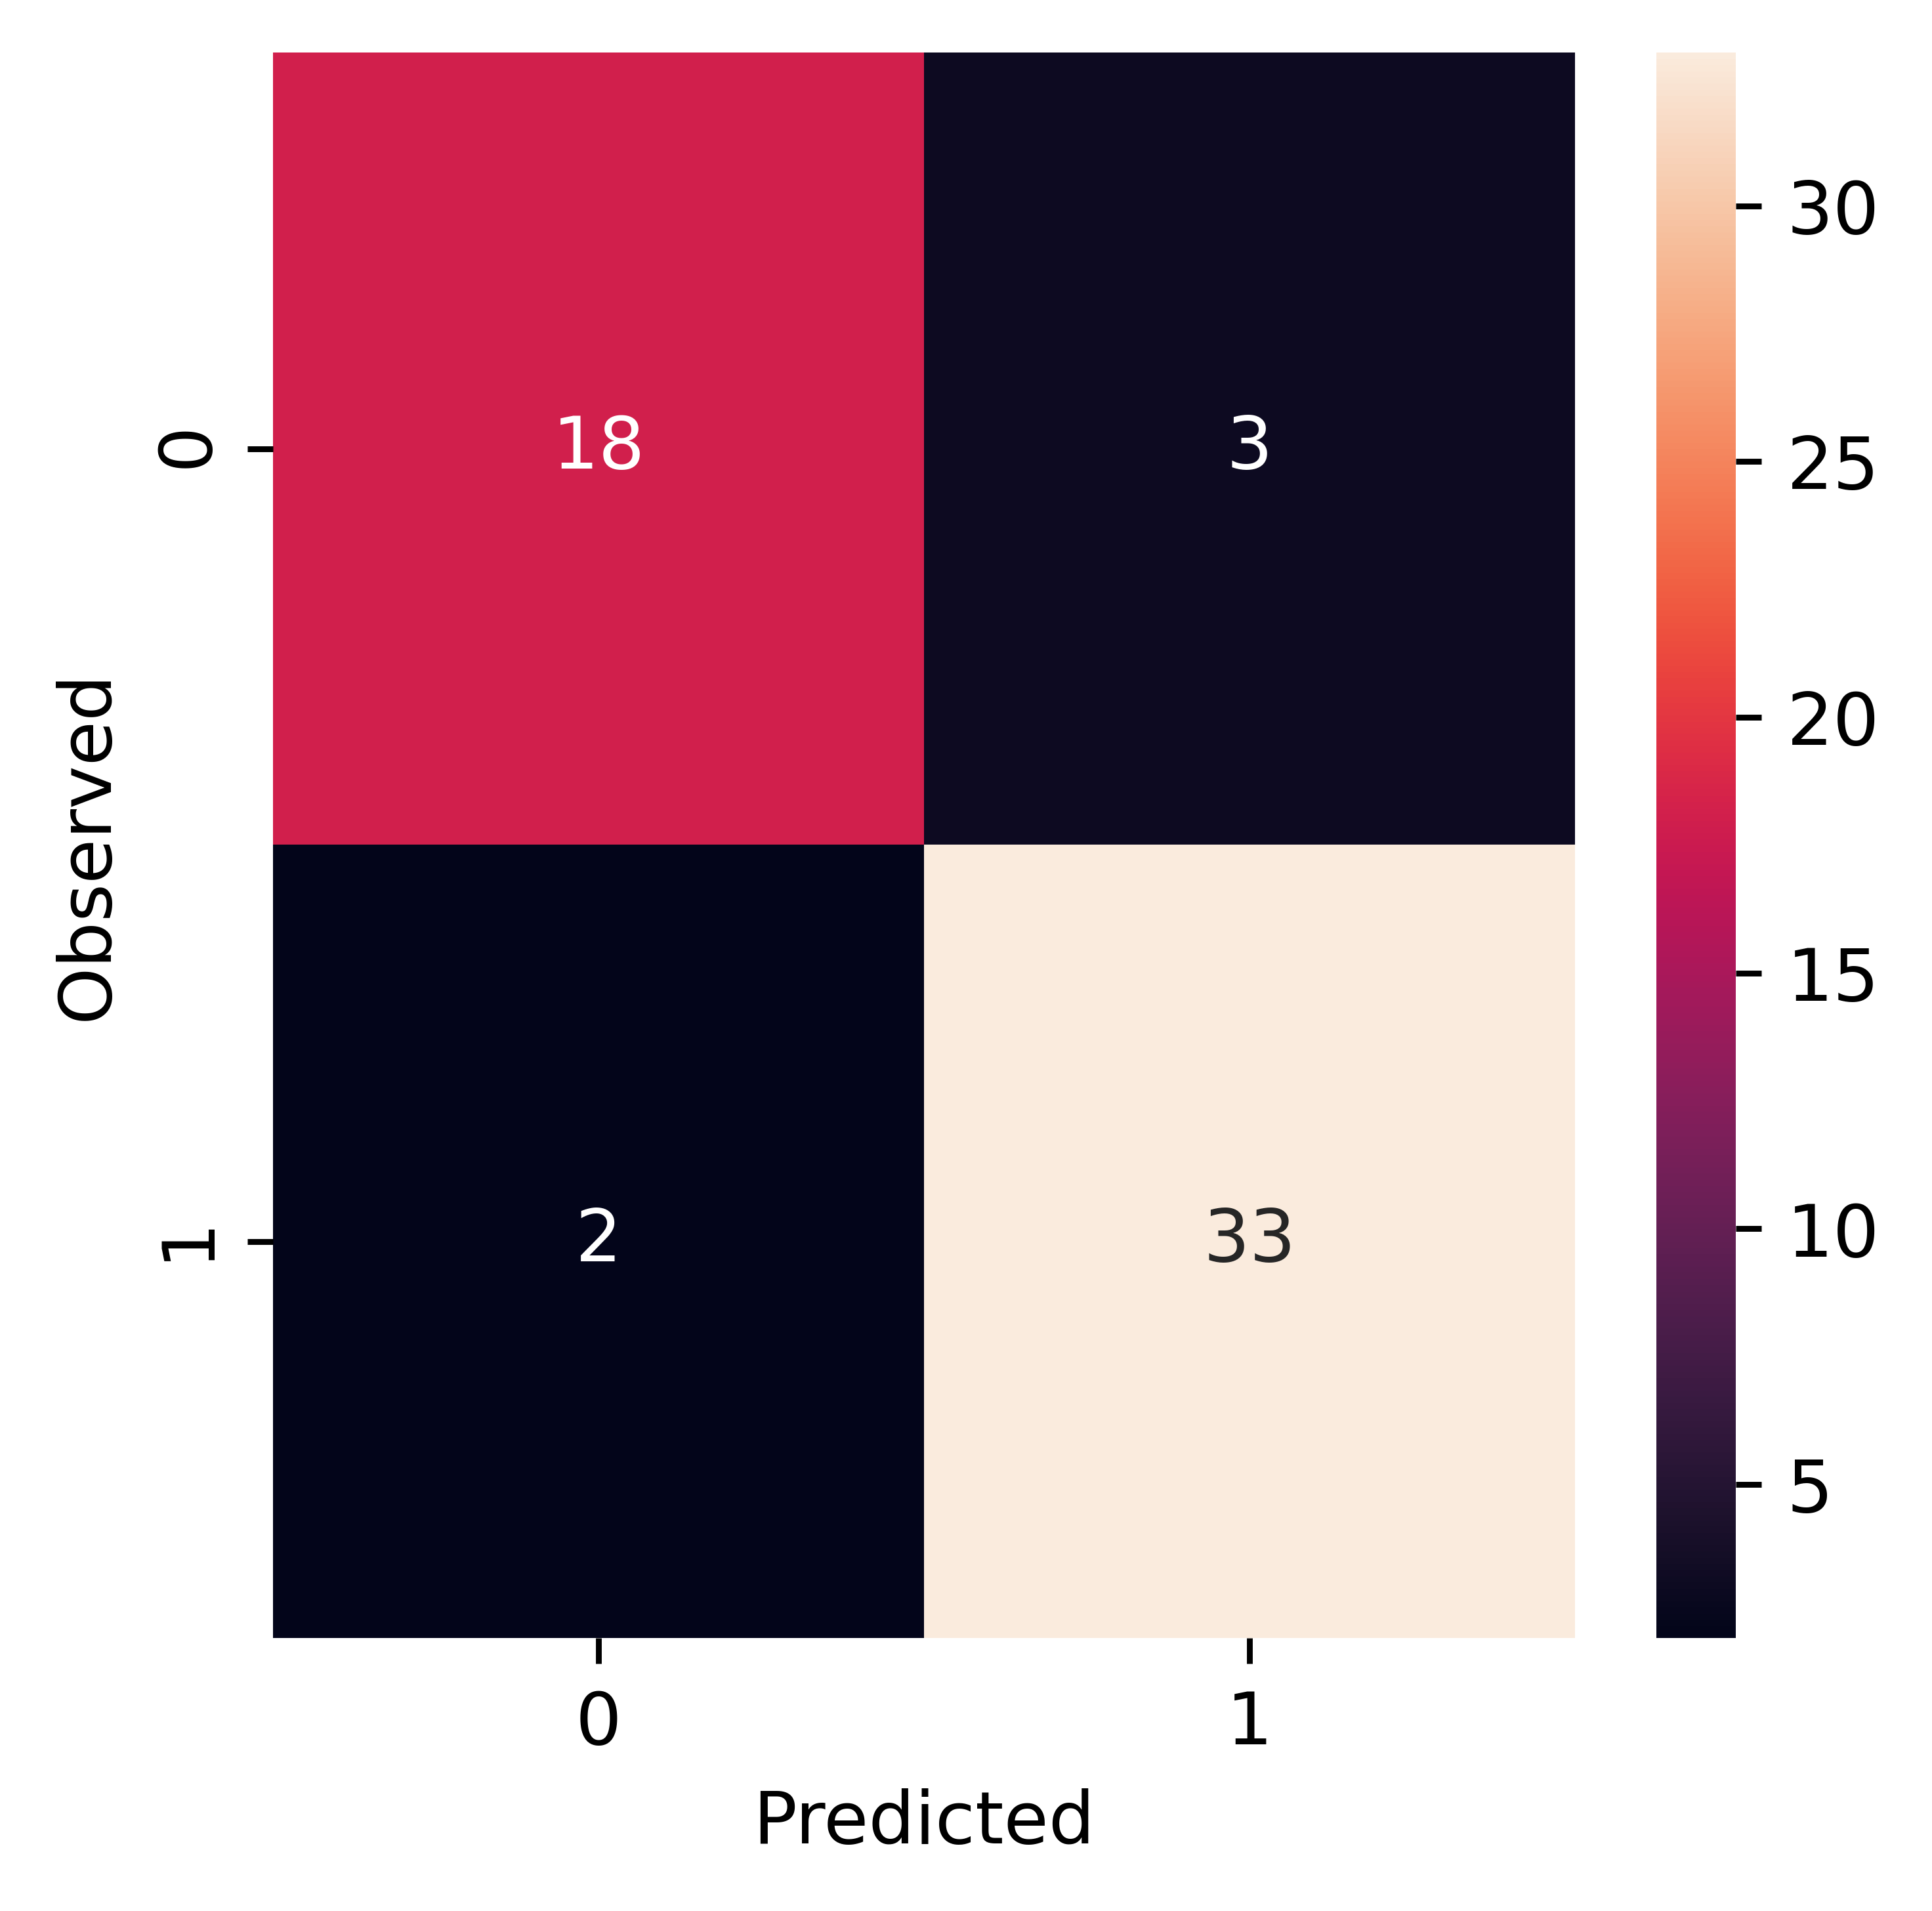

In [49]:
# Confusion Matrix for Logistic Regression Train data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(ytr,lr.predict(xtr));

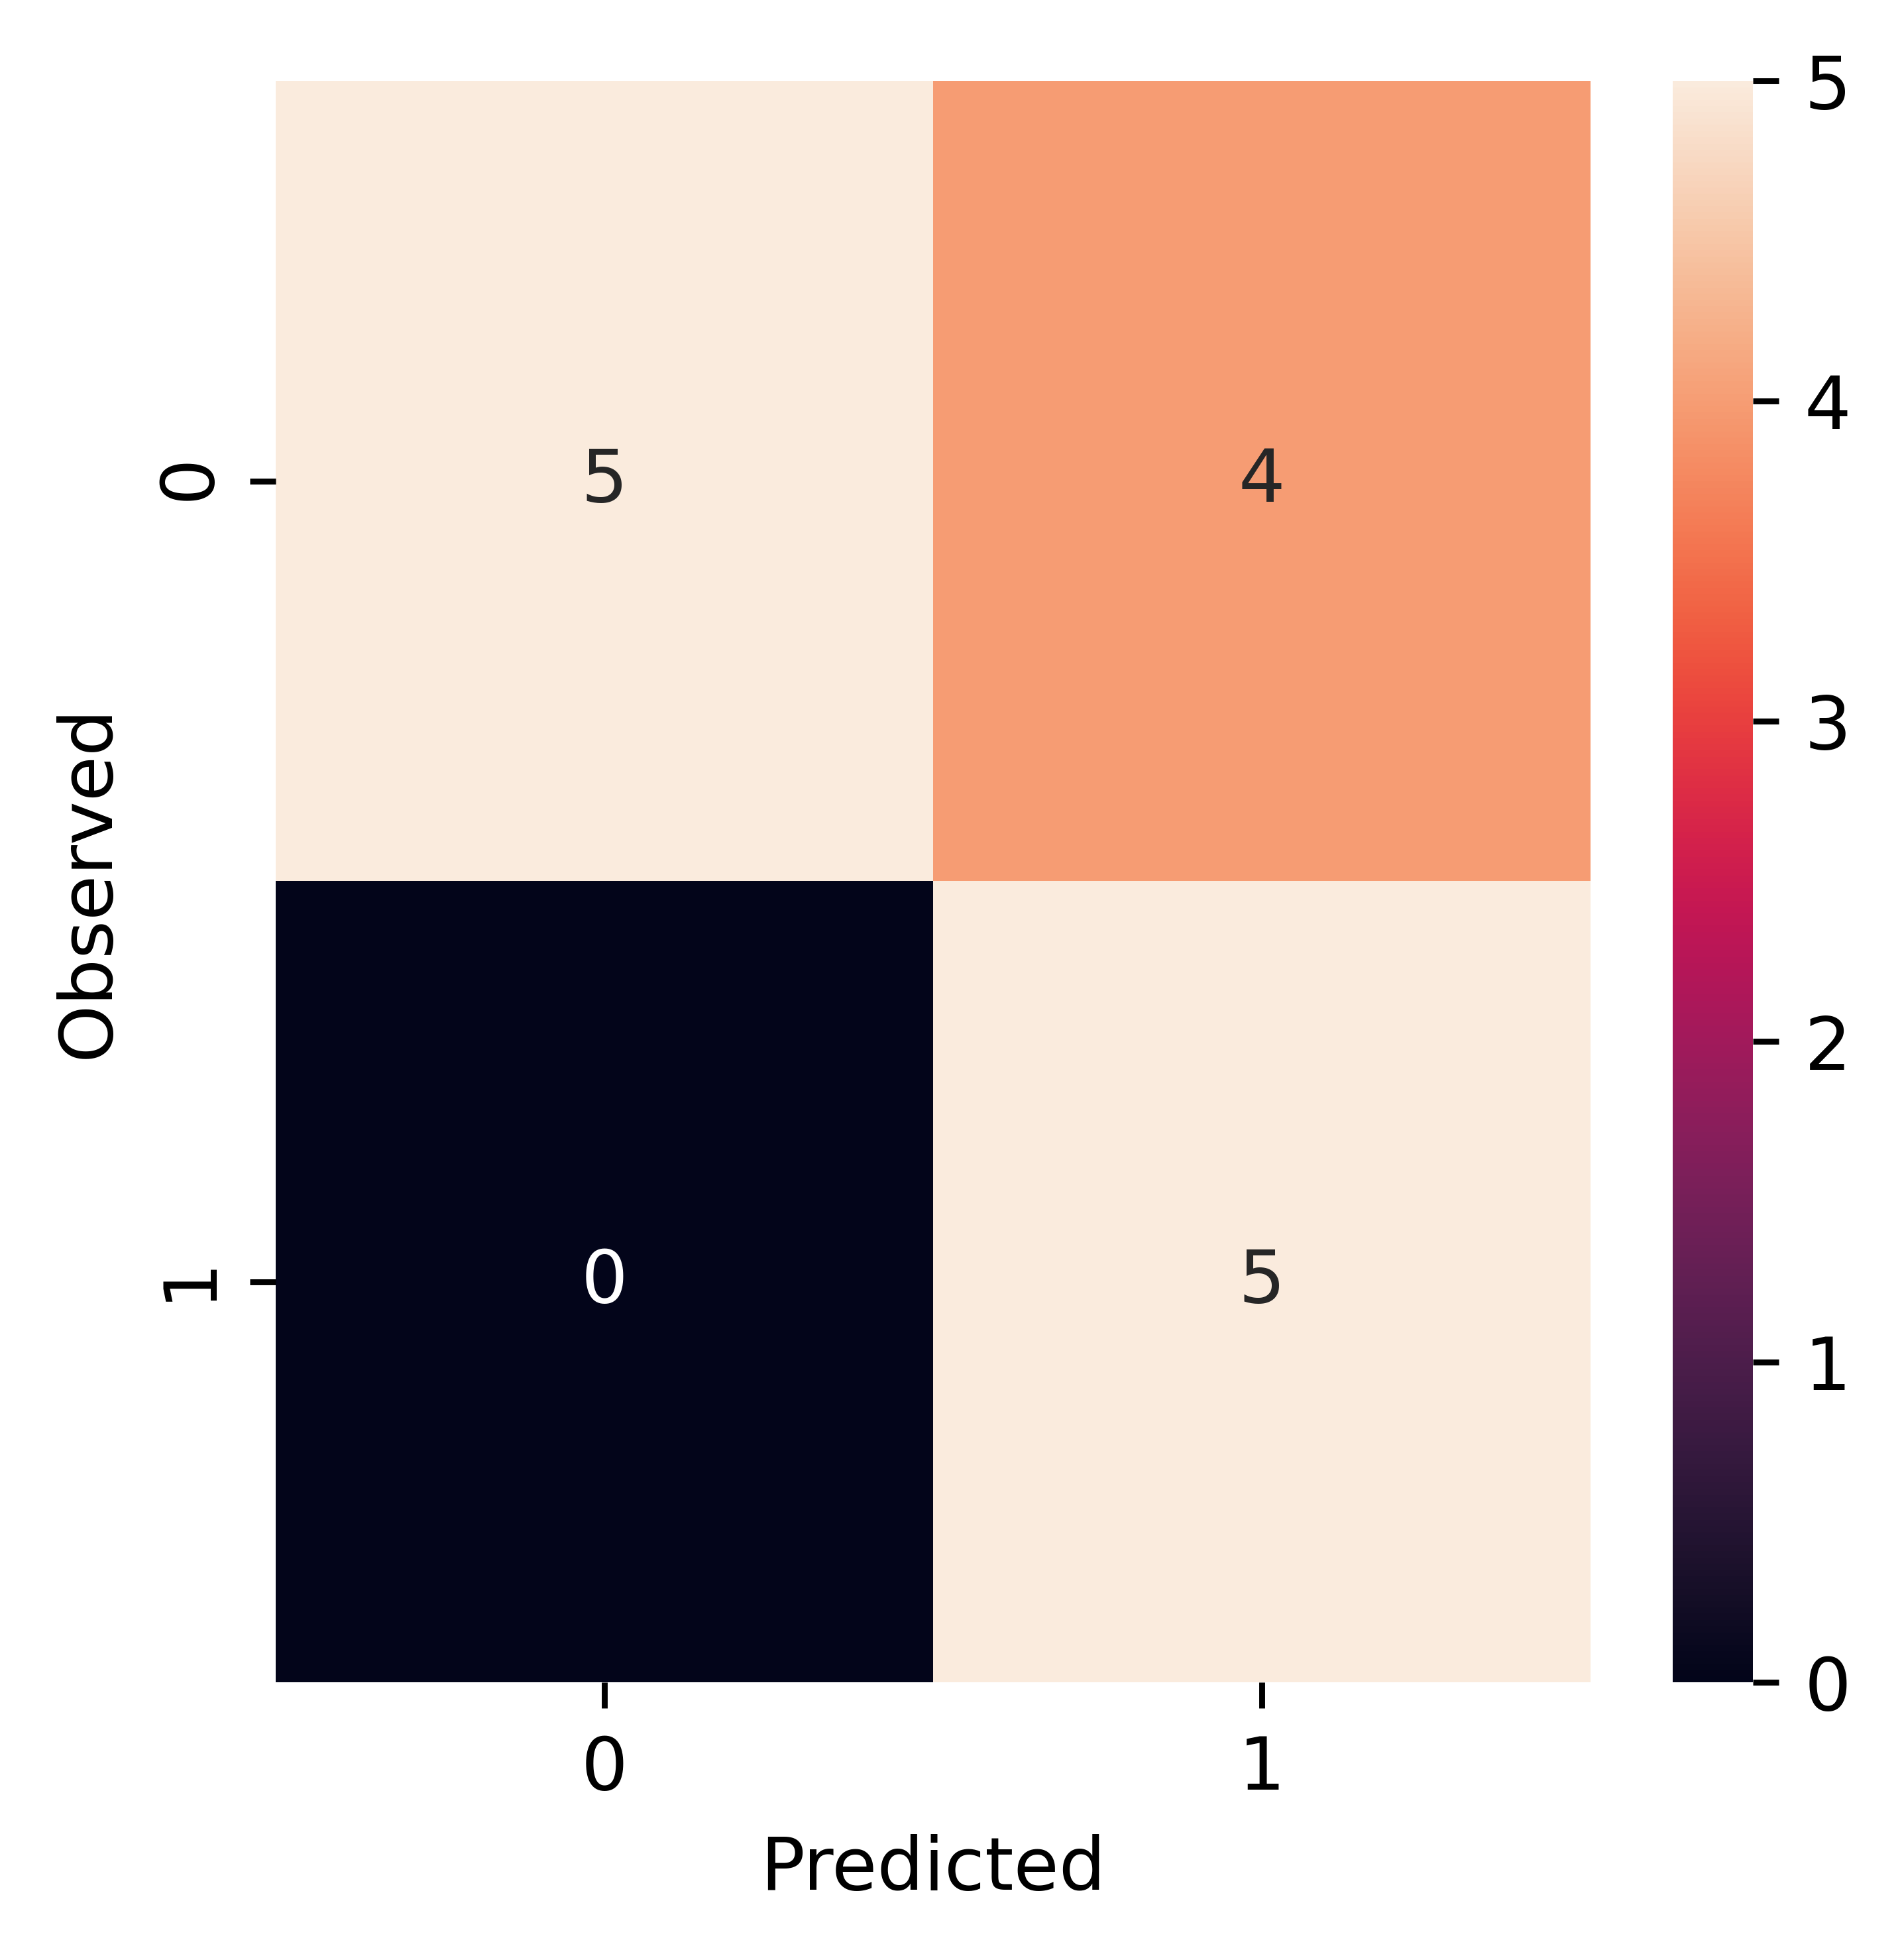

In [50]:
# Confusion Matrix for logistic Regression test data
plt.figure(figsize=(4,4),dpi=800)
draw_cm(yte,lr.predict(xte));